We’re going to learn in this tutorial YOLO object detection. Yolo is a deep learning algorythm which came out on may 2016 and it became quickly so popular because it’s so fast compared with the previous deep learning algorythm.

With yolo we can detect objects at a relatively high speed. With a GPU we would be able to process over 45 frames/second while with a CPU around a frame per second.

### How to install YOLO?

Let’s clear up a few things. YOLO is a deep learning algorythm, so itself doesn’t need any installation, what we need instead is a deep learning framework where to run te algorythm.

Here I’m going to describe the 3 most used and known frameworks compatible with YOLO and the advantages and disadvantages of each one:

**Darknet:** it’s the framework built from the developer of YOLO and made specifically for yolo.

**Advantage:** it’s fast, it can work with GPU or CPU

**Disadvantage:** it olny works with Linux os

**Darkflow:** it’s the adaptation of darknet to Tensorflow (another deep leanring framework).

**Advantage:** it’s fast, it can work with GPU or CPU, and it’s also compatible with Linux, Windows and Mac.
Disadvantage: the installation it’s really complex, especially on windows

**Opencv:** also opencv has a deep learning framework that works with YOLO. Just make sure you have opencv 3.4.2 at least.

**Advantage:** it works without needing to install anything except opencv.

**Disadvantage:** it only works with CPU, so you can’t get really high speed to process videos in real time.


## Download Weights and Config files for YOLOv3

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2021-07-22 15:04:17--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.2’

yolov3.cfg.2        100%[===================>]   8.15K  --.-KB/s    in 0s      

2021-07-22 15:04:17 (84.8 MB/s) - ‘yolov3.cfg.2’ saved [8342/8342]

--2021-07-22 15:04:17--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.2’

yolov3.weights.2    100%[===================>] 236.52M  45.1MB/s    in 5.6s    

2021-07

## Import Libs

#### How to use YOLO with Opencv
We will focus in this tutorial on how to use YOLO with Opencv. This is the best approach for beginners, to get quickly the algorythm working without doing complex installations.

Let’s start by importing the libraries Opencv and numpy and then we load the algorythm.

We import the classes:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load Yolo Model

We load the algorythm. The run the algorythm we need three files:

**Weight file:** it’s the trained model, the core of the algorythm to detect the objects.

**Cfg file:** it’s the configuration file, where there are all the settings of the algorythm.

Name files: contains the name of the objects that the algorythm can detect.

In [ ]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Load Image

We then load the image where we want to perform the object detection and we also get its width and height.

In [ ]:
# Loading image
img = cv2.imread("book.jpeg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

Now that we have the algorythm ready to work and also the image, it’s time to pass the image into the network and do the detection.

Keep in mind that we can’t use right away the full image on the network, but first we need it to convert it to blob. Blob it’s used to extract feature from the image and to resize them. YOLO accepts three sizes:

* 320×320 it’s small so less accuracy but better speed
* 609×609 it’s bigger so high accuracy and slow speed
* 416×416 it’s in the middle and you get a bit of both.

The outs on line 21 it’s the result of the detection. Outs is an array that conains all the informations about objects detected, their position and the confidence about the detection.

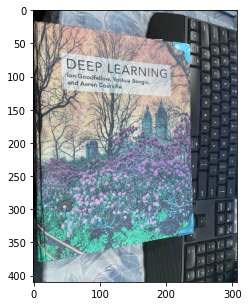

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

## Convert Image into Blob

In [ ]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

At this point the detection is done, and we only need to show the result on the screen.

We then loop trough the outs array, we calculate the confidence and we choose a confidence threshold.

We set a threshold confidence of 0.5, if it’s greater we consider the object correctly detected, otherwise we skip it.

The threshold goes from 0 to 1. The closer to 1 the greater is the accuracy of the detection, while the closer to 0 the less is the accuracy but also it’s greater the number of the objects detected.

## Find Bounding Box

In [ ]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

When we perform the detection, it happens that we have more boxes for the same object, so we should use another function to remove this “noise”.
It’s called **Non maximum suppresion**

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

## Draw BB

We finally extract all the informations and show them on the screen.

* **Box:** contain the coordinates of the rectangle sorrounding the object detected.
* **Label:** it’s the name of the object detected
* **Confidence:** the confidence about the detection from **0 to 1**

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

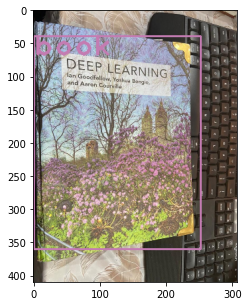

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

It’s called Non maximum suppresion.